# 4.3 다변량 시각화
## 다변량 시각화
두 개 이사의 변수로 구성된 데이터의 관계를 시각화 기반으로 파악하는 데이터 탐색 유형  
=> 주어진 **변수 간의 패턴 및 관계를** 다양한 그래프의 시각화를 토앻 전체적으로 파악
 
## 다변량 시각화의 종류
|데이터 조합|비시각화 방안|목적|
|---|---|---|
|범주형-범주형|**모자이크플롯**|두 개 범주형 변수 내 **범주 별 조합의 빈도 크기를 개략적**으로 파악|
|범주형-연속형|**박스플롯<br>평행좌표**|**범주 별 기술통계량 및 경향성을 개략적**으로 파악|
|연속형-연속형|**산점도**|**연속형 변수 간 관계성을 개략적**으로 파악(선형/비선형 및 음양 방향 등)|

## 모자이크 플롯
범주형 - 범주형 변수 조합 내 그롭(Subgroup) 크기 비교
- 범주 그룹 간 비중의 차이를 전체적으로 파악 가능
- 범주 수가 많고, 각 조합별 비중 차이가 크지 않을 경우 전체적 파악이 어려울 수 있음

## 박스 플롯
범주형 - 연속형 변수 조합 간 전반적 요약 통계량 파악
- 많은 데이터를 눈으로 직접 확인하기 어렵고, 대표적 통계 값만으로 파악하기 어려울 땐 용이함
- 범주 그룹(범주형 변수) 간 수치(연속형 변수)의 집합 범위와 중앙값, 이상치 등을 빠르게 확인할 수 있음
- 비시각화 기반의 단순 수치값 비교보다 데이터가 설명하는 많은 정보 획득 가능

## 평행좌표
범주형 - 연속형 변수 조합 간 경향성 파악
- 연속형 데이터 기반으로 범주 별 경향성 파악에 용이함
- 데이터의 트렌드 판단 가능
- 연속형 변수 간 단위 표준화가 이루어지기 전의 데이터로 시각화할 경우 파악이 어려울 수 있음

## 산점도
연속형 - 연속형 변수 조합 간 상관도 파악
- 연속형 데이터 간의 관계를 그래프상으로 어떠한 관계가 있는지 파악하기 위함
- 변수 간 분포를 통해 선형 혹은 비선형 관계 및 음양의 방향 등을 빠르게 파악할 수 있음
- 범주 Label 간 비교가 필요할 경우, 해당 부분의 그룹 정보를 표시하면 변수 간 관계 및 범주 그룹 간 관계를 함께 파악 가능

## 실습

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    data = load_boston()


In [6]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['MEDV'])

housing = pd.merge(X, y, left_index=True, right_index=True, how='inner')

housing_data = housing.copy()

### 범주형-범주형 다변량 시각화
#### 모자이크플롯

In [7]:
housing_data = housing_data.astype({'CHAS':'object'})
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


In [8]:
medv_bins = [
    0,
    np.mean(housing_data['MEDV']),
    np.max(housing_data['MEDV'])
]
medv_names = ['cheap', 'expensive']
housing_data['MEDV_G'] = pd.cut(housing_data['MEDV'], medv_bins, labels=medv_names)

INDUS_bins = [
    0,
    np.mean(housing_data['INDUS']),
    np.max(housing_data['INDUS'])
]
INDUS_names = ['INDUS_LOW', 'INDUS_HIGH']
housing_data['INDUS_G'] = pd.cut(housing_data['INDUS'], INDUS_bins, labels=INDUS_names)

RAD_bins = [
    0,
    np.mean(housing_data['RAD']),
    np.max(housing_data['RAD'])
]
RAD_names = ['RAD_LOW', 'RAD_HIGH']
housing_data['RAD_G'] = pd.cut(housing_data['RAD'], RAD_bins, labels=RAD_names)

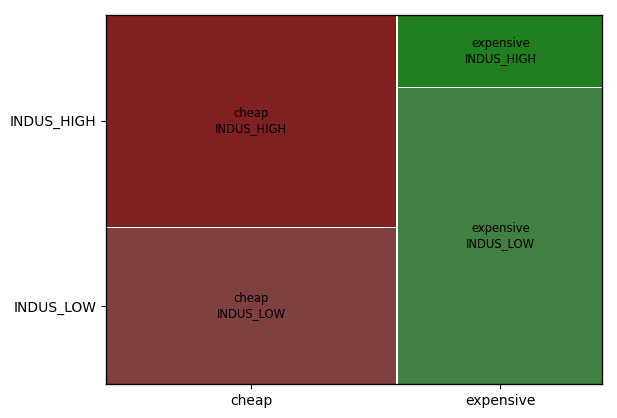

In [11]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(housing_data, ['MEDV_G', 'INDUS_G'])
plt.show()

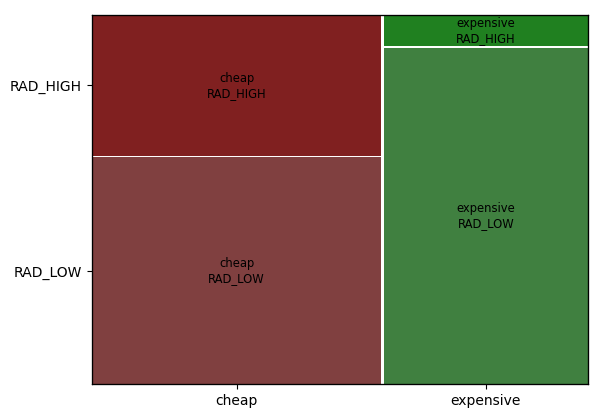

In [12]:
mosaic(housing_data, ['MEDV_G', 'RAD_G'])
plt.show()

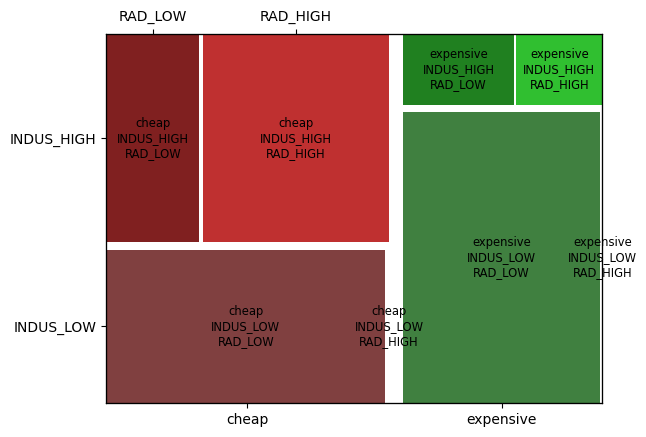

In [16]:
mosaic(housing_data, ['MEDV_G', 'INDUS_G', 'RAD_G'], gap=0.03)
plt.show()

### 범주형-연속형 다변량 시각화
#### 박스플롯


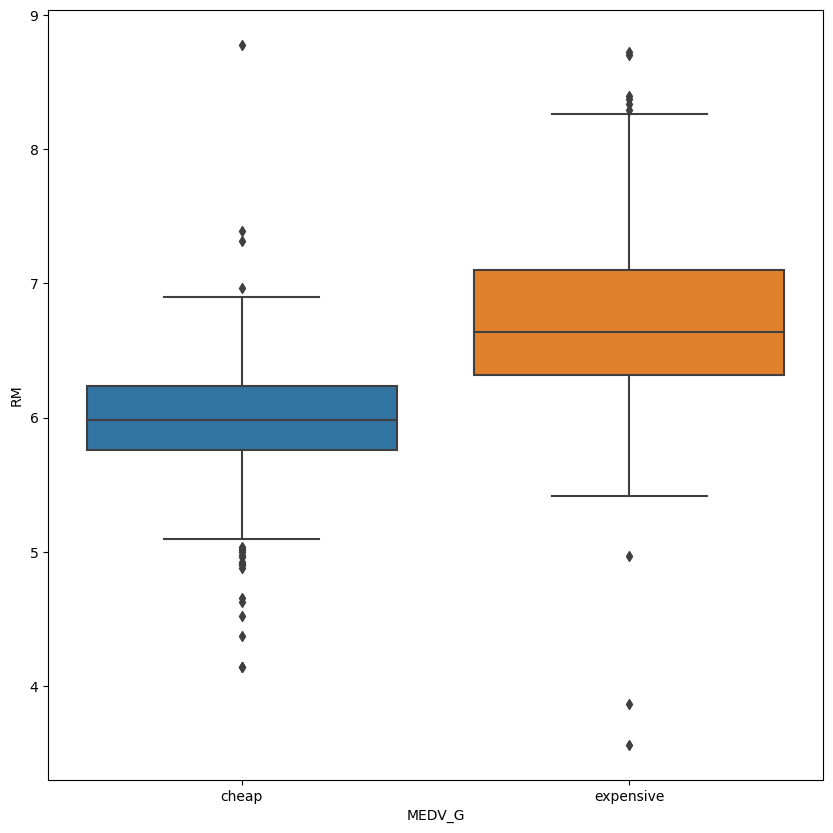

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=housing_data, x='MEDV_G', y='RM')
plt.show()

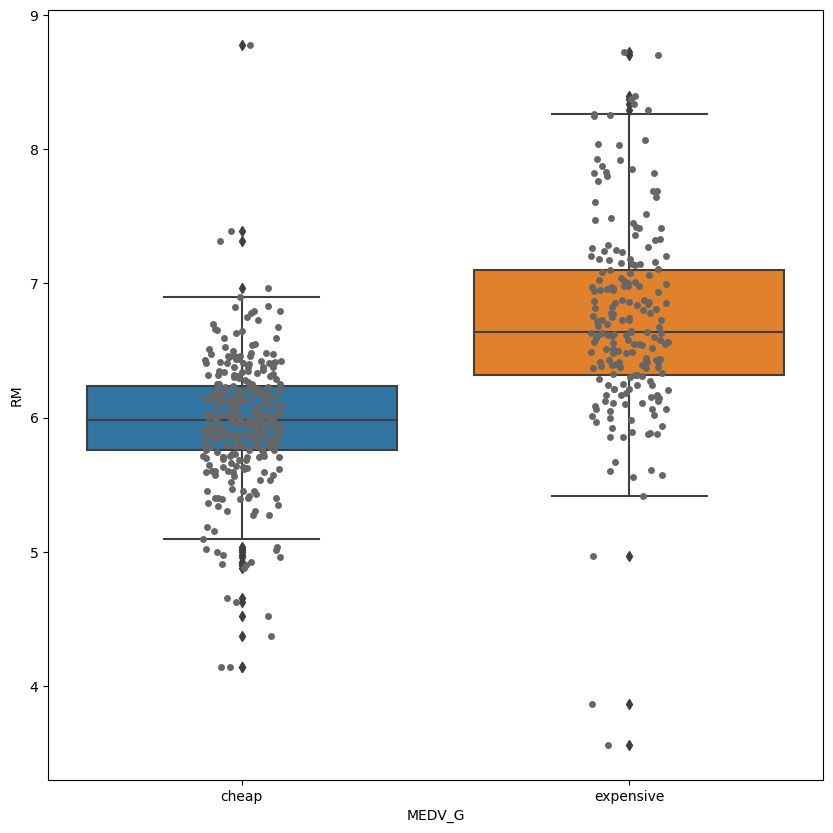

In [19]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=housing_data, x='MEDV_G', y='RM')
sns.stripplot(data=housing_data, x='MEDV_G', y='RM', color="0.4")
plt.show()

#### 평행좌표

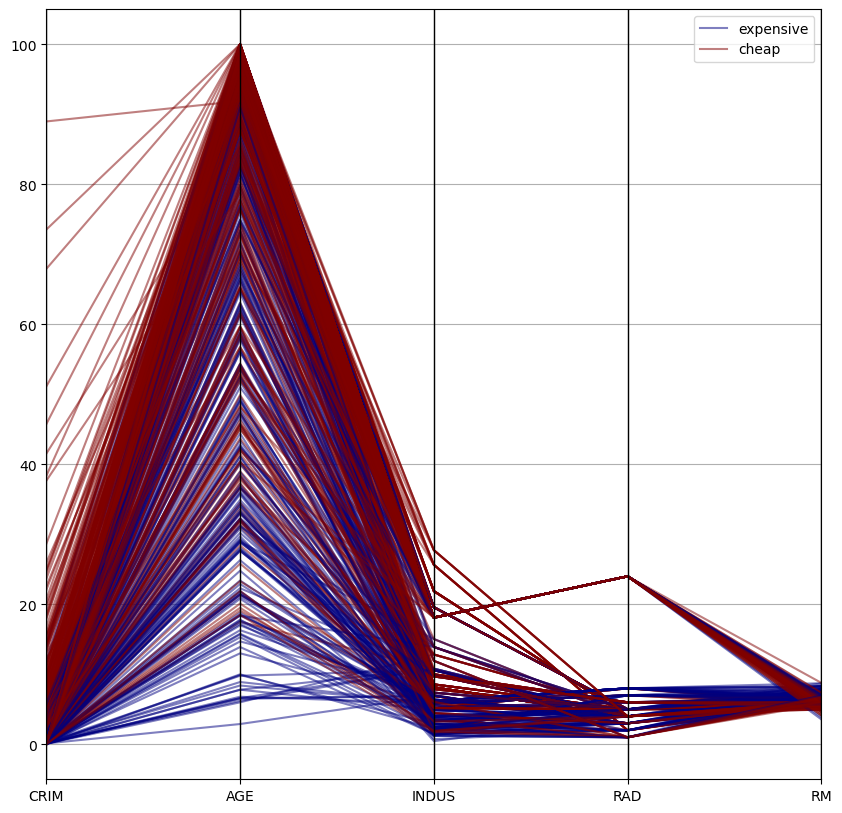

In [20]:
from pandas.plotting import parallel_coordinates

sub_data = housing_data[['CRIM', 'AGE', 'INDUS', 'RAD', 'RM', 'MEDV_G']]

plt.figure(figsize=(10, 10))
parallel_coordinates(sub_data, 'MEDV_G', colormap=plt.get_cmap('jet'), alpha=0.5)
plt.show()

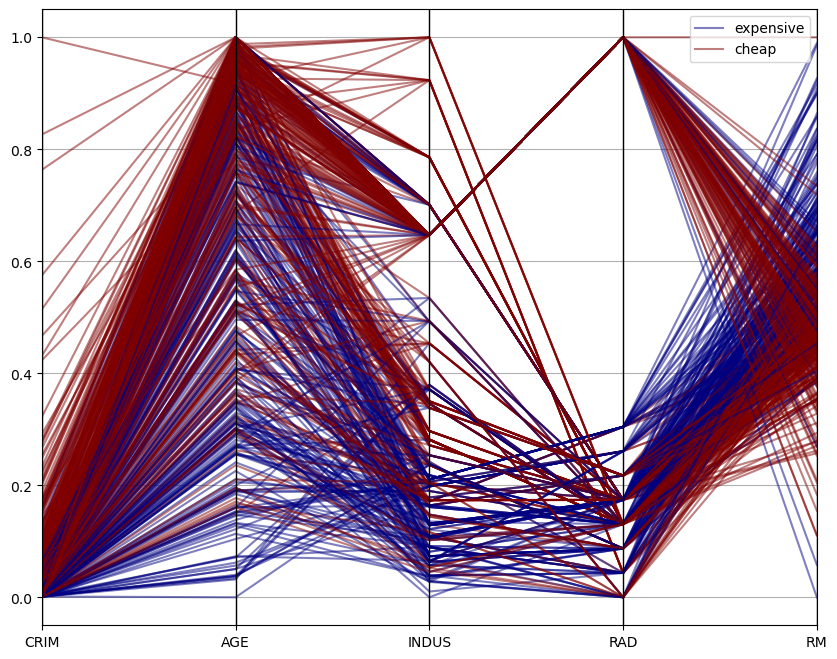

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = sub_data[['CRIM', 'AGE', 'INDUS', 'RAD', 'RM']]
x_norm = pd.DataFrame(scaler.fit_transform(x_df), columns=['CRIM', 'AGE', 'INDUS', 'RAD', 'RM'])

sub_data_scale = pd.merge(x_norm, sub_data[['MEDV_G']], left_index=True, right_index=True, how='inner')

plt.figure(figsize=(10, 8))
parallel_coordinates(sub_data_scale, 'MEDV_G', colormap=plt.get_cmap('jet'), alpha=0.5)
plt.show()

### 연속형-연속형 다변량 시각화
#### 산점도

In [22]:
housing_data = housing.copy()

housing_data = housing_data.astype({'CHAS':'object'})

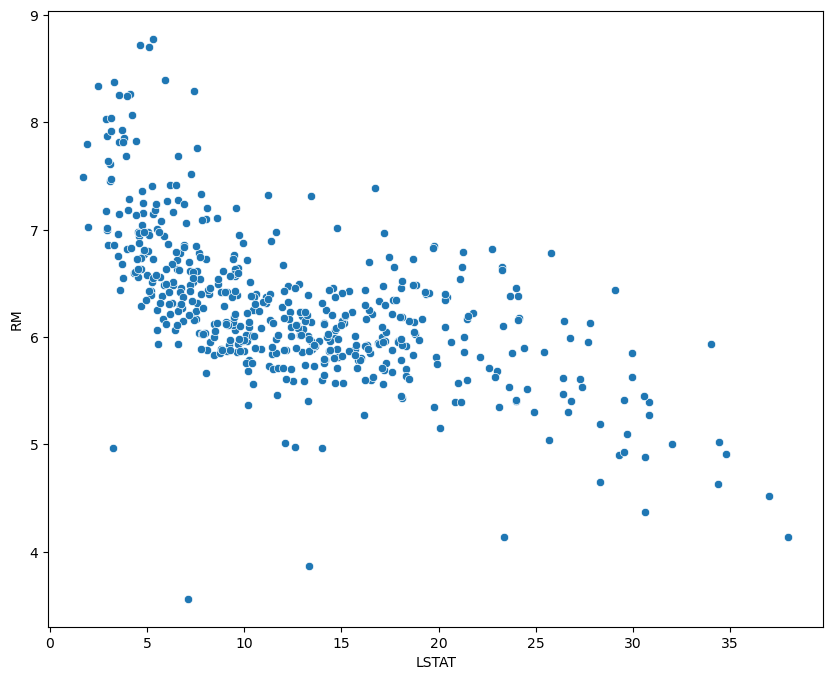

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LSTAT', y='RM', data=housing_data)
plt.show()

In [24]:
import scipy.stats as stats
stats.pearsonr(housing_data.LSTAT, housing_data.RM)

(-0.6138082718663956, 1.033009132965579e-53)

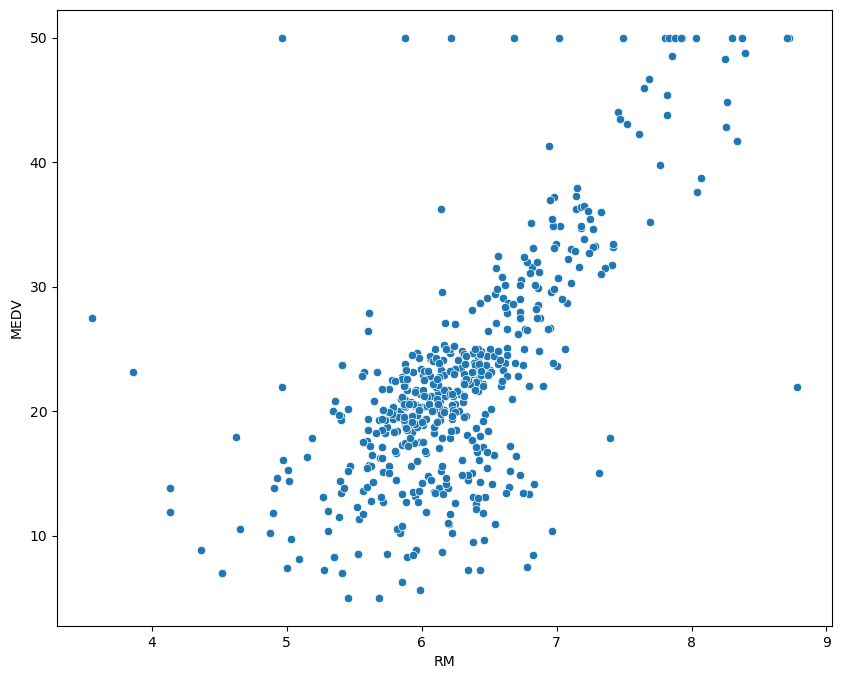

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='RM', y='MEDV', data=housing_data)
plt.show()

In [26]:
stats.pearsonr(housing_data.RM, housing_data.MEDV)

(0.6953599470715388, 2.4872288710082904e-74)

#### Heatmap

In [27]:
sample_data ={
    'city' : ['seoul', 'seoul', 'seoul', 'newyork', 'newyork', 'newyork', 'london', 'london', 'london'],
    'year' : ['2020', '2021', '2022', '2020', '2021', '2022', '2020', '2021', '2022'],
    'visitor' : [998712, 873164, 124502, 3376442, 2478621, 874510, 2129451, 1878551, 688781]
}

columns = ['city', 'year', 'visitor']
sample_df = pd.DataFrame(sample_data, columns=columns)
sample_df

,city,year,visitor
0,seoul,2020,998712
1,seoul,2021,873164
2,seoul,2022,124502
3,newyork,2020,3376442
4,newyork,2021,2478621
5,newyork,2022,874510
6,london,2020,2129451
7,london,2021,1878551
8,london,2022,688781


In [28]:
pivot_df = sample_df.pivot('city', 'year', 'visitor')
pivot_df

year,2020,2021,2022
city,,,
london,2129451,1878551,688781
newyork,3376442,2478621,874510
seoul,998712,873164,124502


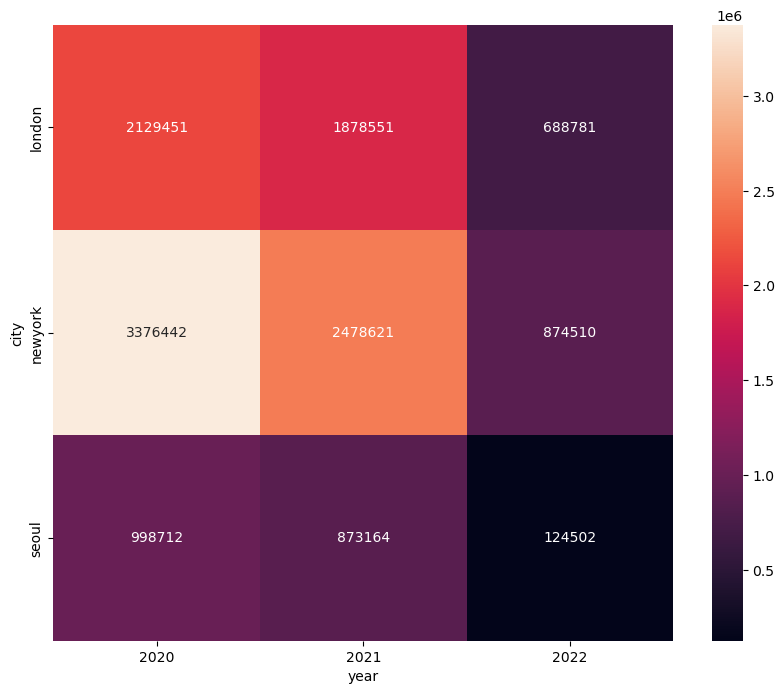

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt='d')
plt.show()